# Estimation of the NMZI model's parameters

In [1]:
import matplotlib.pyplot as plt

import sys
sys.path.append('/adeleravagnani/non-markovian-zero-intelligence-lob-simulator/Modules/')
import LOB_data as LOB
import NMZI_parameters as NMZI_p

Load files

In [2]:
path_folder = '/.../TSLA_2015-01-01_2015-01-31_10/'
path_ob_file = 'TSLA_2015-01-05_34200000_57600000_orderbook_10.csv'
path_message_file = 'TSLA_2015-01-05_34200000_57600000_message_10.csv'

tick_size = 0.01

data = LOB.LOB_data(path_folder, path_message_file, path_ob_file, tick_size)
data.load_and_clean_LOB_data()
data.cut_before_and_after_LOB_data(60, 60)


Loading message and order book file ...
Check shapes of the new files: True
Data set lenght: 271321

Message file first lines
           Time  Type       ID  Size   Price  Direction
0  34200.005047     4  8498383    40  214.46          1
1  34200.008011     3  8498383   160  214.46          1
2  34200.008637     3  8519079   200  214.97         -1
3  34200.043668     1  8541883    20  214.36          1
4  34200.078412     1  8555441  5000  214.50          1

Order book file first lines
   AskPrice_1  AskSize_1  BidPrice_1  ...  AskSize_10  BidPrice_10  BidSize_10
0      214.97        200      214.46  ...           7       213.93          50
1      214.97        200      214.40  ...           7       213.78          50
2      215.48         25      214.40  ...           1       213.78          50
3      215.48         25      214.40  ...           1       213.93          50
4      215.48         25      214.50  ...           1       214.00         110

[5 rows x 40 columns]

Cleaning m

100%|██████████| 264313/264313 [00:09<00:00, 27178.97it/s]


Check shapes of the new files: True
New shape is 269891

Handling hidden orders ...
Dropping hidden orders ...
Check shapes of the new files: True
New shape is 266003

Loading and cleaning of the dataset completed!
First time available corresponds to  9.50 hours after midnight
Last time available corresponds to 16.00 hours after midnight
Now, first time available corresponds to 10.50 hours after midnight
Now, last time available corresponds to 15.00 hours after midnight
Check shapes of the new files: True
New shape is 170416


In [3]:
message_file = data.message_file
ob_file = data.ob_file
n_levels = data.n_levels

In [4]:
[v_0, lam, mu, delta, mean_inter_arrival_times] = NMZI_p.estimate_parameters_SantaFe(data, verbose = True)

Parameters estimation
The mean size of LOs (in number of shares) is 101.1057.
The total LO arrival rate per event per unit price is 0.0131.
The total MO arrival rate per event is 0.0441.
The total cancellation rate per unit volume and per event is 0.1174.
The mean inter-arrival time between orders is 0.0951 seconds.


In [5]:
average_spread = ((ob_file['AskPrice_1'] - ob_file['BidPrice_1']).mean())*100
print('Mean spread is %.2f tick size'%(average_spread))

Mean spread is 16.71 tick size


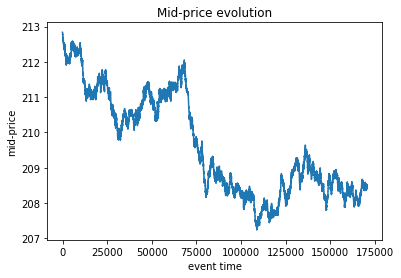

In [6]:
mid_price_evolution_emp = ((ob_file['AskPrice_1'] + ob_file['BidPrice_1'])/2)
plt.plot(mid_price_evolution_emp.to_numpy())
plt.xlabel('event time')
plt.ylabel('mid-price')
plt.title('Mid-price evolution')
plt.show()

In [7]:
print('Volatility is: %.2f'%mid_price_evolution_emp.std())

Volatility is: 1.44


In [8]:
print('Events proportions:\n', message_file['Type'].value_counts(normalize = True))

Events proportions:
 Type
1    0.499014
3    0.475302
4    0.025567
2    0.000117
Name: proportion, dtype: float64
